# Workshop Tutorial: Features (Spots & Gaussian Processes)

In this tutorial we'll learn how to add spots on a star and gaussian processes to a light curve.

This interactive workshop tutorial covers many of the same topics as the corresponding online tutorials:
* [Features](http://phoebe-project.org/docs/2.3/tutorials/features.ipynb)
* [Advanced: Spots](http://phoebe-project.org/docs/2.3/tutorials/spots.ipynb)
* [Example: Gaussian Processes](http://phoebe-project.org/docs/2.3/examples/minimal_GPs.ipynb)

# Setup

In [1]:
import phoebe
from phoebe import u,c

In [2]:
logger = phoebe.logger(clevel='WARNING')

In [3]:
b = phoebe.default_binary()

# Spots

Multiple [spot features](http://phoebe-project.org/docs/2.3/api/phoebe.parameters.feature.spot.md) can be attached to any given Star in the system.  Because of this, they live in the "feature" context (along with future features such as pulsations).  Adding a spot follows the same syntax as datasets or compute options:

In [4]:
b.add_feature('spot', component='primary', feature='spot01')

<ParameterSet: 5 parameters | contexts: feature, compute>

In [5]:
print(b.filter(feature='spot01'))

ParameterSet: 5 parameters
             colat@spot01@feature: 0.0 deg
              long@spot01@feature: 0.0 deg
            radius@spot01@feature: 1.0 deg
           relteff@spot01@feature: 1.0
         enabled@phoebe01@compute: True


As a shortcut, you can call [b.add_spot](http://phoebe-project.org/docs/2.3/api/phoebe.frontend.bundle.Bundle.add_spot.md):

In [6]:
b.add_spot(component='secondary', feature='spot02')

<ParameterSet: 5 parameters | contexts: feature, compute>

The spot is parameterized by the colatitude (where 0 is defined as the North (spin) Pole) and longitude (where 0 is defined as pointing towards the other star for a binary, or to the observer for a single star) of its center, its angular radius, and the ratio of temperature of the spot to the local intrinsic value.

# Gaussian Processes

Similarly to spots, multiple [gaussian process features](http://phoebe-project.org/docs/2.3/api/phoebe.parameters.feature.gaussian_process.md) can be attached - but instead of being attached to a Star (component), they are attached to a light curve (dataset).

In [7]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,1,101), dataset='lc01')

<ParameterSet: 78 parameters | contexts: constraint, dataset, figure, compute>

This can be done with either [b.add_feature](http://phoebe-project.org/docs/2.3/api/phoebe.frontend.bundle.Bundle.add_feature.md) and passing 'gaussian_process' as the first argument or [b.add_gaussian_process](http://phoebe-project.org/docs/2.3/api/phoebe.frontend.bundle.Bundle.add_gaussian_process.md).

In [8]:
b.add_feature('gaussian_process', dataset='lc01', feature='gp01')

<ParameterSet: 8 parameters | contexts: feature, compute>

In [9]:
print(b.filter(feature='gp01'))

ParameterSet: 5 parameters
              kernel@gp01@feature: matern32
           log_sigma@gp01@feature: 0.0
             log_rho@gp01@feature: 0.0
                 eps@gp01@feature: 0.01
    enabled@gp01@phoebe01@compute: True


Gaussian processes do not do anything unless there are observational data attached to the dataset.

In [10]:
print(b.run_checks())

Run Checks Report: FAIL
ERROR: gaussian process requires observational data and sigmas (5 affected parameters, affecting run_compute)


So let's add some observational data that we'll be using in the second week (and cheat for now and set a period that is close to correct), just so that we can see how the model is exposed.

In [11]:
import numpy as np
times, fluxes, sigmas = np.loadtxt('data/synthetic/lc.data', unpack=True)

In [12]:
b.set_value('period', component='binary', value=1.67)
b.add_dataset('lc', times=times, fluxes=fluxes, sigmas=sigmas, dataset='lc01', overwrite=True)

<ParameterSet: 52 parameters | contexts: compute, constraint, figure, feature, dataset>

In [13]:
print(b.run_checks())

Run Checks Report: PASS



In [14]:
b.run_compute()

100%|██████████| 200/200 [00:20<00:00,  9.57it/s]


<ParameterSet: 5 parameters | qualifiers: gps, times, fluxes_nogps, comments, fluxes>

Now our model contains two new parameters `gps` (the GP component of the fluxes) and `fluxes_nogps` (such that `fluxes = fluxes_nogps + gps`.  

Note that even if `compute_times` or `compute_phases` is provided, the resulting model will be exposed at all underlying dataset times (even though the physical model was compute at `compute_times` and then interpolated onto the dataset times).

In [15]:
print(b.get_model())

ParameterSet: 5 parameters
R              times@latest@model: [0.04695476 0.11714084 0.18521794 ... 9.78618342
 9.88373838 9.98847007] d
R             fluxes@latest@model: [1.52492326 1.53248645 1.51481089 ... 1.52155672
 1.53653945 1.52804889] W / m2
            comments@latest@model: 
R                gps@latest@model: [-0.01676198 -0.45513955 -0.47841869 ... -0.47625305
 -0.45202745  0.18573559] W / m2
R       fluxes_nogps@latest@model: [1.54168524 1.987626   1.99322958 ...
 1.99780977 1.9885669  1.3423133 ] W / m2


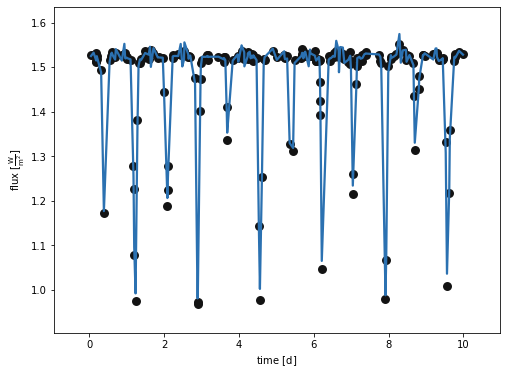

In [16]:
_ = b.plot(show=True)

Mon, 31 May 2021 11:04 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.
Mon, 31 May 2021 11:04 PARAMETERS   WARNING defaulting to i='times' to plot in time-order because system is time_dependent.  Pass i='phases' to override.


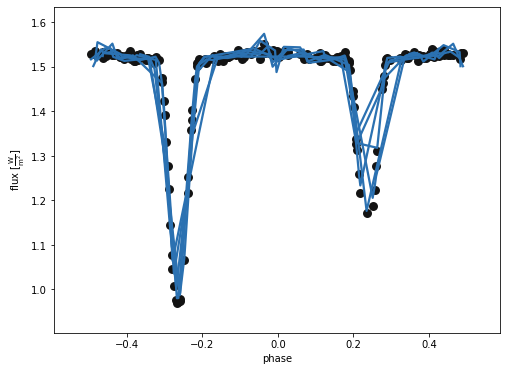

In [17]:
_ = b.plot(x='phases', show=True)

# Exercise

Plot a light curve with and without a spot.

Make a mesh plot that shows the presence of a spot and get comfortable with how the coordinate system is defined.  Try for both binary systems and single stars.

Try creating a synthetic light curve set as in the [Gaussian Process example online](http://phoebe-project.org/docs/2.3/examples/minimal_GPs) and play with different kernel and plotting options.